In [1]:
import pandas as pd 
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
# gensim
from gensim import corpora, models, similarities, matutils
from gensim.models import Word2Vec

#load imdb 
from keras.datasets import imdb
from keras.preprocessing import sequence

# keras
np.random.seed(13)
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Activation, SimpleRNN, GRU, LSTM, Convolution1D, MaxPooling1D, Merge, Dropout
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop

Using TensorFlow backend.


In [2]:
# load data (max 40 features)
# use sequence.pad_sequences to ensure consistent input lengths
max_features = 20000    
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
maxlen = 40

In [3]:
X_train=sequence.pad_sequences(X_train,maxlen=maxlen)
X_test=sequence.pad_sequences(X_test,maxlen=maxlen)

In [26]:
X_train.shape

(25000, 40)

In [ ]:
# develop ANN 

In [32]:
model = Sequential()

model.add(Dense(64, input_dim=40, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(46, kernel_initializer='uniform'))
model.add(Activation('softmax'))

# Momentum: gradient descent moves faster if gradient keeps pointing in the same direction
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history= model.fit(X_train, y_train,
          nb_epoch=20,
          batch_size=16,
          validation_data=(X_test,y_test),callbacks=[cb])




/Users/julialintern/anaconda/envs/mypython3/lib/python3.6/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 10s 405us/step - loss: 0.7747 - acc: 0.4975 - val_loss: 0.6981 - val_acc: 0.5000
Epoch 2/20
25000/25000 [==============================] - 10s 382us/step - loss: 0.6995 - acc: 0.4956 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 3/20
25000/25000 [==============================] - 9s 380us/step - loss: 0.6983 - acc: 0.5004 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 4/20
25000/25000 [==============================] - 9s 365us/step - loss: 0.6972 - acc: 0.5020 - val_loss: 0.6939 - val_acc: 0.5014


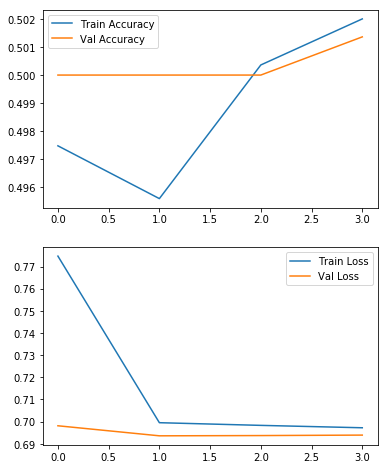

In [49]:
# visualize results

fig, ax=plt.subplots(2,1,figsize=(6,8))

ax[0].plot(history.history['acc'],label="Train Accuracy")
ax[0].plot(history.history['val_acc'],label="Val Accuracy")
ax[0].legend();

ax[1].plot(history.history['loss'],label="Train Loss")
ax[1].plot(history.history['val_loss'],label="Val Loss")
ax[1].legend();

In [53]:
# develop an RNN : compare results

model2=Sequential()
model2.add(Embedding(input_dim=max_features,output_dim=100,embeddings_initializer="glorot_uniform", input_length=maxlen))
model2.add(SimpleRNN(20,return_sequences=False))
model2.add(Dense(2))
model2.add(Activation('softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
#SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [57]:
hist2=model2.fit(X_train,y_train,epochs=10,
         validation_data=(X_test,y_test),callbacks=[cb])  # early-stopping call-back



Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 88s 4ms/step - loss: 0.3276 - acc: 0.8598 - val_loss: 0.4361 - val_acc: 0.8030
Epoch 2/10
25000/25000 [==============================] - 95s 4ms/step - loss: 0.2427 - acc: 0.9047 - val_loss: 0.4819 - val_acc: 0.7896
Epoch 3/10
25000/25000 [==============================] - 95s 4ms/step - loss: 0.1615 - acc: 0.9424 - val_loss: 0.5515 - val_acc: 0.7793


In [71]:
model3=Sequential()

model3.add(Embedding(input_dim=max_features,output_dim=100,embeddings_initializer="glorot_uniform", input_length=maxlen))
model3.add(LSTM(20))
model3.add(Dense(2))
model3.add(Activation('softmax'))

model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


hist3=model3.fit(X_train,y_train,epochs=10,
         validation_data=(X_test,y_test),callbacks=[cb])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 207s 8ms/step - loss: 0.5568 - acc: 0.6992 - val_loss: 0.4575 - val_acc: 0.7834
Epoch 2/10
25000/25000 [==============================] - 210s 8ms/step - loss: 0.4129 - acc: 0.8092 - val_loss: 0.4174 - val_acc: 0.8062
Epoch 3/10
25000/25000 [==============================] - 208s 8ms/step - loss: 0.3663 - acc: 0.8353 - val_loss: 0.4124 - val_acc: 0.8089
Epoch 4/10
25000/25000 [==============================] - 199s 8ms/step - loss: 0.3373 - acc: 0.8523 - val_loss: 0.4212 - val_acc: 0.8097
Epoch 5/10
25000/25000 [==============================] - 190s 8ms/step - loss: 0.3169 - acc: 0.8618 - val_loss: 0.4172 - val_acc: 0.8110
Epoch 6/10
25000/25000 [==============================] - 198s 8ms/step - loss: 0.2999 - acc: 0.8723 - val_loss: 0.4379 - val_acc: 0.8025


**What about CNN + LSTM ? **

[ref](https://machinelearningmastery.com/cnn-long-short-term-memory-networks/)

In [28]:
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [29]:
model4=Sequential()
model4.add(Embedding(input_dim=max_features,output_dim=100,embeddings_initializer="glorot_uniform", input_length=maxlen))
model4.add(Convolution1D(filters=64,
                        kernel_size=5,
                        padding='valid',
                        activation='relu',
                        strides=1))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(20))
model4.add(Dense(1))
model4.add(Activation('sigmoid'))


In [30]:
model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist4=model4.fit(X_train,y_train,epochs=10,
         validation_data=(X_test,y_test),callbacks=[cb])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 95s 4ms/step - loss: 0.4658 - acc: 0.7690 - val_loss: 0.3985 - val_acc: 0.8146
Epoch 2/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.2672 - acc: 0.8876 - val_loss: 0.4368 - val_acc: 0.8083
Epoch 3/10
25000/25000 [==============================] - 89s 4ms/step - loss: 0.1183 - acc: 0.9567 - val_loss: 0.6268 - val_acc: 0.7919
Epoch 4/10
25000/25000 [==============================] - 86s 3ms/step - loss: 0.0403 - acc: 0.9876 - val_loss: 0.7589 - val_acc: 0.7881


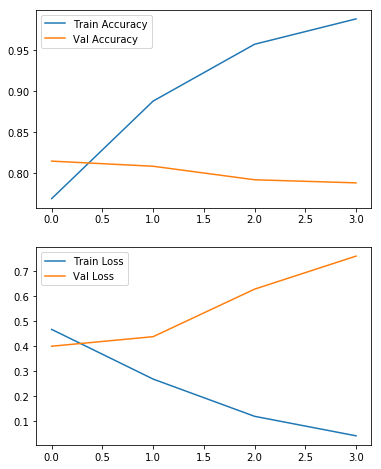

In [32]:
fig, ax=plt.subplots(2,1,figsize=(6,8))

ax[0].plot(hist4.history['acc'],label="Train Accuracy")
ax[0].plot(hist4.history['val_acc'],label="Val Accuracy")
ax[0].legend();

ax[1].plot(hist4.history['loss'],label="Train Loss")
ax[1].plot(hist4.history['val_loss'],label="Val Loss")
ax[1].legend();

**Overfit?** Yes, but perhaps even more importantly: our loss rate 
is increasing     
Try again

[ref](http://cs231n.github.io/neural-networks-3/)

In [96]:
maxlen=100
X_train=sequence.pad_sequences(X_train,maxlen=maxlen)
X_test=sequence.pad_sequences(X_test,maxlen=maxlen)

In [123]:
model4=Sequential()
model4.add(Embedding(input_dim=max_features,output_dim=32,embeddings_initializer="glorot_uniform", input_length=maxlen))
model4.add(Dropout(0.2))   # add drop-out here 
model4.add(Convolution1D(filters=64,
                        kernel_size=5,
                        padding='valid',
                        activation='relu',
                        strides=1))
model4.add(MaxPooling1D(pool_size=4))  
model4.add(LSTM(32,dropout=0.2))  # and add dropout here .. 
model4.add(Dense(1))
model4.add(Activation('sigmoid'))

In [124]:
# seems like my learning rate is too high, lowering lr to .0001 and 
# also adding decay rate 
adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-5)

In [ ]:
# will keep batch =32
model4.compile(loss='binary_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

hist4=model4.fit(X_train,y_train,epochs=10,batch_size=32,
         validation_data=(X_test,y_test),callbacks=[cb])


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 142s 6ms/step - loss: 0.6516 - acc: 0.6084 - val_loss: 0.5093 - val_acc: 0.7584
Epoch 2/10
25000/25000 [==============================] - 158s 6ms/step - loss: 0.4413 - acc: 0.7960 - val_loss: 0.4349 - val_acc: 0.7990
Epoch 3/10
25000/25000 [==============================] - 320s 13ms/step - loss: 0.3574 - acc: 0.8443 - val_loss: 0.4299 - val_acc: 0.7994
Epoch 4/10
25000/25000 [==============================] - 319s 13ms/step - loss: 0.3090 - acc: 0.8702 - val_loss: 0.4380 - val_acc: 0.7985
Epoch 5/10
21536/25000 [========================>.....] - ETA: 1:59:13 - loss: 0.2623 - acc: 0.8942

### Other things to know: 

** Variable input length**

How can we handle sentences of variable length input? 
see what fchollet says [here](https://github.com/keras-team/keras/issues/40) about that

In [59]:
# read in data again,
max_features = 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
maxlen = 40

In [69]:
print(len(X_train[0]))
print(len(X_train[1]))

593
135


In [85]:
model4=Sequential()

model4.add(Embedding(input_dim=max_features,output_dim=100,embeddings_initializer="glorot_uniform"))
model4.add(LSTM(20,return_sequences=False))
model4.add(Dense(2))
model4.add(Activation('softmax'))

model4.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=[]

# just one epoch here & and batch size ==1 ;
for seq,label in zip(X_train,y_train):
    mod=model4.fit(np.array([seq]),np.array([label]),batch_size=1,
                  verbose=0,epochs=1)
    history.append(mod.history)

**Statefulness**

Motivation:  We have a large sequence (let's say time series data) 
and we split it into smaller sequences to contruct training examples 
for our X matrix.  Is it possible for the LSTM to find dependencies
between our sequences?   No. **Not unless we use a 'stateful' LSTM 
and specify stateful=True **


In [123]:
# what about for stateful?
# first try for constant X

model5=Sequential()

model5.add(Embedding(input_dim=max_features,output_dim=100,embeddings_initializer="glorot_uniform",
                     batch_input_shape=(40,1)))
model5.add(LSTM(20,return_sequences=False,stateful=True))
model5.add(Dense(2))
model5.add(Activation('softmax'))

model5.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [107]:
import numpy as np
t=np.expand_dims(np.expand_dims(X_train.flatten(), axis=1), axis=1)

In [122]:
len(X_train[0])
X_train.shape

(25000, 40)

https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/

In [137]:
history=[]

batch_size=32
epochs= 20


for i in range(epochs):
    mod=model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    # hidden state will be reset after every epoch, 
    # as opposed to each batch 
    model.reset_states()
    history.append(mod.history)
        

In a nutshell, (by default) LSTM will pass the states onward on a batch level.  After the batch is over, the LSTM will reset.       
If we want to leverage the previous states for the entire epoch, we'll have to specify 'stateful=True' 

In [78]:
from keras.utils import np_utils

from keras.utils.np_utils import to_categorical

In [79]:
test=to_categorical(y_train)

In [80]:
test

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [81]:
y_train

array([0, 1, 1, ..., 1, 0, 1])